In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets

In [73]:
pip install ipywidgets


Note: you may need to restart the kernel to use updated packages.


In [2]:
sns.set_style('whitegrid')
data = pd.read_csv('per-capita-co-emissions.csv')
data.head()

,Entity,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.010837
2,Afghanistan,1951,0.011625
3,Afghanistan,1952,0.011468
4,Afghanistan,1953,0.013123


In [3]:
data.columns = ['Country', 'Year', 'Annual Co2 emissions']
data

,Country,Year,Annual Co2 emissions
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.010837
2,Afghanistan,1951,0.011625
3,Afghanistan,1952,0.011468
4,Afghanistan,1953,0.013123
...,...,...,...
26177,Zimbabwe,2019,0.672038
26178,Zimbabwe,2020,0.547083
26179,Zimbabwe,2021,0.645913
26180,Zimbabwe,2022,0.648759


In [28]:
paises = ['Spain', 'China', 'United States', 'France', 'Russia', 'Tunisia', 'Morocco']
paises_interes = data[data['Country'].isin(paises)].copy()
paises_interes

,Country,Year,Annual Co2 emissions
4853,China,1907,0.048403
4854,China,1908,0.055021
4855,China,1909,0.058310
4856,China,1910,0.059680
4857,China,1911,0.058271
...,...,...,...
24918,United States,2019,15.578152
24919,United States,2020,13.889587
24920,United States,2021,14.793602
24921,United States,2022,14.870761


In [29]:
print(f"Años disponibles: {data['Year'].min()} - {data['Year'].max()} ")

Años disponibles: 1750 - 2023 


In [30]:
print("Valores nulos por columnas")
data.isnull().sum()

Valores nulos por columnas


Country                 0
Year                    0
Annual Co2 emissions    0
dtype: int64

In [31]:
### graficos

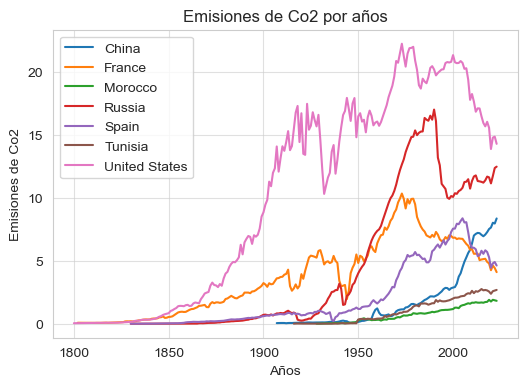

In [32]:
plt.figure(figsize=(6,4))
sns.lineplot(x='Year', y='Annual Co2 emissions', hue = 'Country', data=paises_interes)
plt.xlabel('Años')
plt.ylabel('Emisiones de Co2')
plt.title('Emisiones de Co2 por años')
plt.legend(title = 'Pais')
plt.grid(True, alpha=0.6)
plt.show()

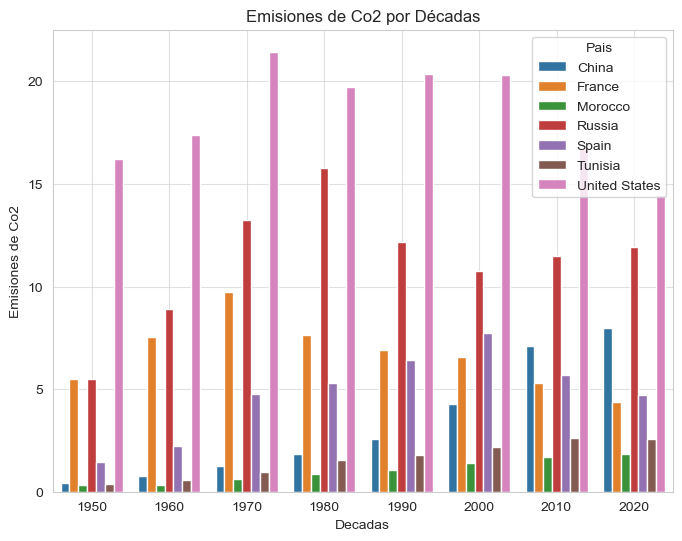

In [34]:
paises_interes.loc[:, 'Decada'] = (paises_interes['Year'] // 10) *10
data_decada = paises_interes[paises_interes['Decada'] >= 1950]
media_decada = data_decada.groupby(['Country', 'Decada'])['Annual Co2 emissions'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='Decada', y='Annual Co2 emissions', data=media_decada, hue='Country')
plt.xlabel('Decadas')
plt.ylabel('Emisiones de Co2')
plt.title('Emisiones de Co2 por Décadas')
plt.legend(title = 'Pais')
plt.grid(True, alpha=0.6)
plt.show()

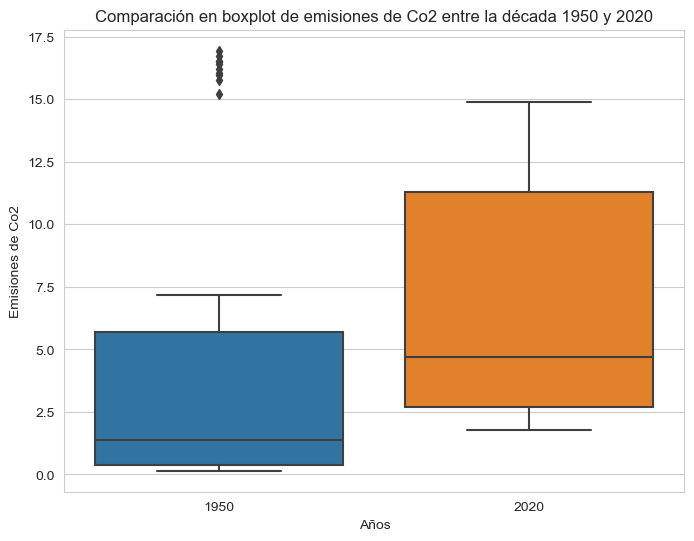

In [40]:
decada_1950_2020 = paises_interes[paises_interes['Decada'].isin([1950, 2020])].copy()
decada_1950_2020.loc[:, 'Decada Label'] = decada_1950_2020['Decada'].astype(str)

plt.figure(figsize=(8,6))
sns.boxplot(x='Decada Label', y='Annual Co2 emissions', data=decada_1950_2020)
plt.xlabel('Años')
plt.ylabel('Emisiones de Co2')
plt.title('Comparación en boxplot de emisiones de Co2 entre la década 1950 y 2020')
plt.show()

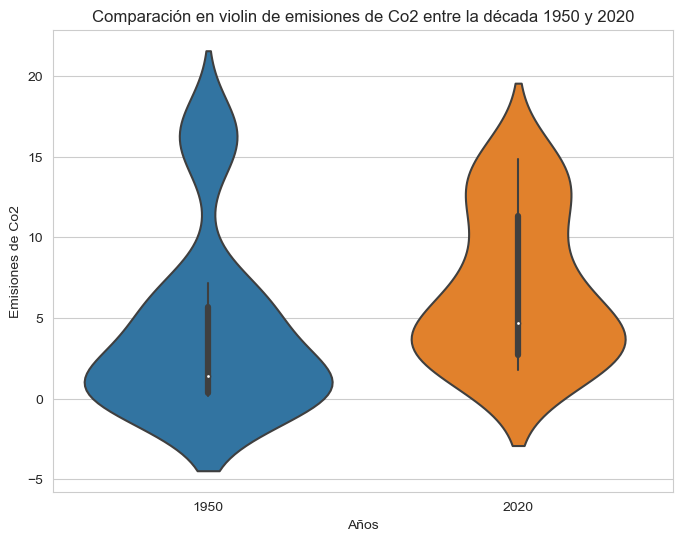

In [41]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Decada Label', y='Annual Co2 emissions', data=decada_1950_2020)
plt.xlabel('Años')
plt.ylabel('Emisiones de Co2')
plt.title('Comparación en violin de emisiones de Co2 entre la década 1950 y 2020')
plt.show()

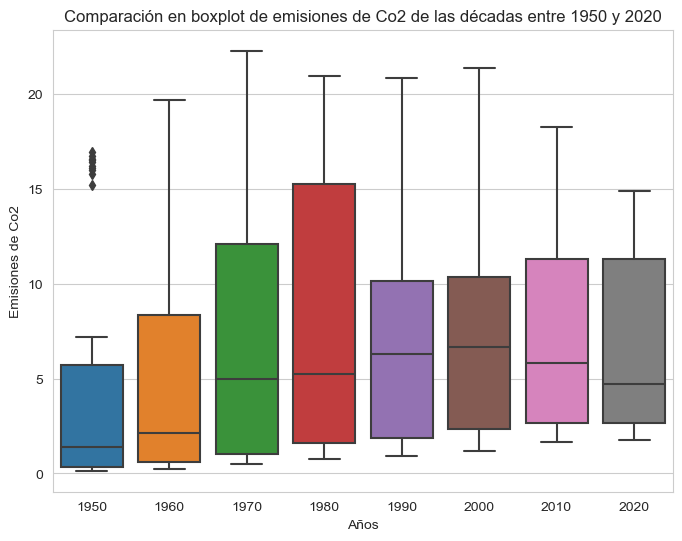

In [42]:
all_decadas = paises_interes[paises_interes['Year'] >= 1950]

plt.figure(figsize=(8,6))
sns.boxplot(x='Decada', y='Annual Co2 emissions', data=all_decadas)
plt.xlabel('Años')
plt.ylabel('Emisiones de Co2')
plt.title('Comparación en boxplot de emisiones de Co2 de las décadas entre 1950 y 2020')
plt.show()

Country     China    France   Morocco     Russia     Spain   Tunisia  \
Year                                                                   
1800          NaN       NaN       NaN        NaN       NaN       NaN   
1801          NaN       NaN       NaN        NaN       NaN       NaN   
1802          NaN  0.076622       NaN        NaN       NaN       NaN   
1803          NaN       NaN       NaN        NaN       NaN       NaN   
1804          NaN  0.073936       NaN        NaN       NaN       NaN   
...           ...       ...       ...        ...       ...       ...   
2019     7.526400  4.792605  1.898316  11.635810  5.282923  2.556061   
2020     7.647183  4.255957  1.764810  11.156076  4.443056  2.379329   
2021     8.025529  4.624558  1.900860  11.739155  4.798705  2.586756   
2022     7.964286  4.428381  1.861968  12.379388  4.906229  2.636084   
2023     8.366814  4.101154  1.820817  12.485688  4.625513  2.687845   

Country  United States  
Year                    
1800         

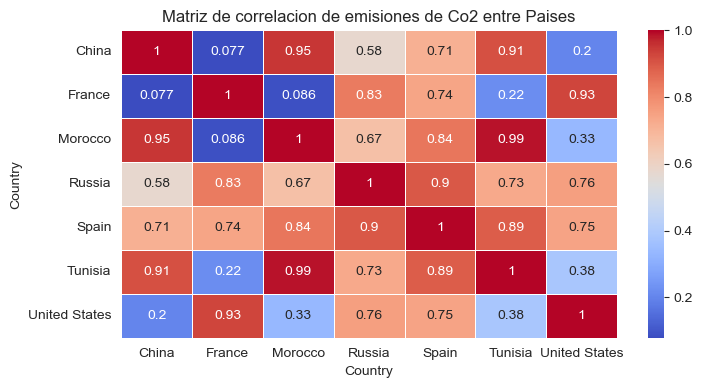

In [80]:
pivot_data = paises_interes.pivot(index='Year', columns='Country', values='Annual Co2 emissions')
print(pivot_data)
correlacion = pivot_data.corr()
plt.figure(figsize=(8,4))
sns.heatmap(correlacion, annot=True, cmap = 'coolwarm', linewidth=0.5)
plt.title('Matriz de correlacion de emisiones de Co2 entre Paises')
plt.show()

In [81]:
countries = paises_interes['Country'].unique() 

def scatter_plot_dynamic(country1, country2, trendline=False):
    if country1 == country2:
        print("Selecciona 2 paises diferentes para comparar")
        return 
    
    data1 = paises_interes[paises_interes['Country'] == country1]
    data2 = paises_interes[paises_interes['Country'] == country2]
    
    juntar_datos = data1[['Year', 'Annual Co2 emissions']].merge(data2[['Year', 'Annual Co2 emissions']], on='Year', suffixes = (f'_{country1}', f'_{country2}'))

    correlacion = juntar_datos[f'Annual Co2 emissions_{country1}'].corr(juntar_datos[f'Annual Co2 emissions_{country2}'])

    plt.figure(figsize=(6,4))
    sns.scatterplot(data=juntar_datos, x=f'Annual Co2 emissions_{country1}', y=f'Annual Co2 emissions_{country2}')
    plt.xlabel(f'Emisiones Co2 {country1}')
    plt.ylabel(f"Emisiones Co2 {country2}")
    plt.title(f"Relacion entre emisiones de Co2 de {country1} y {country2}\nCoeficiente de correlacion: {correlacion}")
    
    if trendline:
              x= juntar_datos[f"Annual Co2 emissions_{country1}"]
              y= juntar_datos[f"Annual Co2 emissions_{country2}"]
              m, b = np.polyfit(x,y,1)
              plt.plot(x, m*x + b, color = 'red', linestyle='--', label=f"Tendencia(y-(m:.2f)x + (b:.2f))")
              plt.legend()
    plt.show()
              

In [82]:
interact(scatter_plot_dynamic,
        country1 = widgets.Dropdown(options=countries, description='Pais 1', value= 'Russia'),
        country2 = widgets.Dropdown(options=countries, description='Pais 2', value= 'China'),
        trendline = widgets.Checkbox(value=False, description='Mostrar linea de tendencia'))

interactive(children=(Dropdown(description='Pais 1', index=3, options=('China', 'France', 'Morocco', 'Russia',…

<function __main__.scatter_plot_dynamic(country1, country2, trendline=False)>